# <center> NoteBook 🔏 :  `Hotel booking demand` ©️ </center> 

  
##### We will answer the following Questions : How Many Booking Were Cancelled? What is the booking ratio between Resort Hotel and City Hotel? What is the percentage of booking for each year? Which is the most busy month for hotel? From which country most guest come? How Long People Stay in the hotel? Which was the most booked accommodation type (Single, Couple, Family)? ... ?


##### After that we will make predictive model to predict whether the booking will be cancelled or not :

- EDA
- Pre-processing and manipulation & wrangling the data
- Data analysis
- Perform the Feature Engineering to make new featuers 
- Perform the Data Selection to select only relevant features **
- Tranform the Data (Categorial to Numerical)
- Split the data (Train Test Split)
- Model the data (Fit the Data)
- And finally Evaluate our model

Let's Start 
### 🔏🔏🔏 90% of the ipynb file are deleted because of confidentialyty ©️©️©️©️
<hr><hr>

In [109]:
import os
import math
import datetime

import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns

In [110]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [111]:
plt.style.use('ggplot')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['g','r','blue','violet','y','gold','orange'])  #Define the colors that will be using in the notebook
#sns.set(color_codes=True)

In [112]:
pd.set_option("display.max_columns", None) #Removes the limit for the number of displayed columns
pd.set_option("display.max_rows", 100) # Sets the limit for the number of displayed rows
%matplotlib inline

In [113]:
data = pd.read_csv("hotel_booking_raw_dataset.csv")
data.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [114]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [115]:
data.shape

(119390, 32)

In [116]:
df = data.copy()
df.shape

(119390, 32)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [118]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


# Data Cleaning

In [10]:
#Check if there are any duplicate values in rows
df.duplicated().any()

True

In [11]:
#Number of rows which has duplicate values
df.duplicated().sum()

31994

In [12]:
#Show the rows thet has duplicate values
df[df.duplicated(keep=False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,7/7/2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,7/7/2015
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,7/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119372,City Hotel,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,9/4/2017


In [13]:
#Drop rows thet has duplicate values
df_duplicated_values_droped = df.drop_duplicates(inplace=False) #return new DataFrame
#We can set the argument(inplace = True) to remove duplicates from original DataFrame.
df_duplicated_values_droped

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


<hr>

La décision de conserver ou de supprimer les lignes dupliquées dans votre dataset dépend de plusieurs facteurs spécifiques à votre problème de machine learning et au type de modèle que vous utilisez. Voici quelques considérations pour vous aider à décider :

**Considérations pour conserver les lignes dupliquées**   

    - Volume de données : Si votre dataset est relativement petit, conserver les doublons peut aider à augmenter le volume de données, ce qui peut être bénéfique pour l'entraînement de certains modèles, notamment ceux qui nécessitent une grande quantité de données pour généraliser correctement.

    - Nature des données : Si les doublons représentent des événements légitimes qui se produisent plusieurs fois, les supprimer pourrait introduire un biais. Par exemple, dans un dataset de transactions, une même transaction répétée peut être valide.
    ==> Ca c'est notre cas, car les rows duplicés peuvent représenter différentes réservatuins mais avec les mêmes caracterestique

**Approche pratique**   

     - Analyse exploratoire : Faites une analyse exploratoire pour comprendre la nature des doublons. Sont-ils significatifs ou juste du bruit ?

    - Tests comparatifs : Vous pouvez entraîner deux versions de votre modèle, une avec les doublons et une sans, puis comparer les performances pour voir quel dataset donne les meilleurs résultats.

    - Validation croisée : Utilisez la validation croisée pour évaluer la performance de votre modèle sur différents sous-ensembles de données. Cela peut aider à comprendre l'impact des doublons sur les performances du modèle.

**Conclusion**   
La décision de conserver ou de supprimer les doublons dépendra de l'impact sur votre modèle. Il est souvent utile de tester les deux approches et de comparer les résultats pour prendre une décision éclairée. Assurez-vous de bien comprendre la source et la nature des doublons avant de les supprimer.

<hr>

In [14]:
df.shape

(119390, 32)

In [15]:
#Checking if our data has any missing values
df.isna().sum().sort_values(ascending=False)

#The above command gives an integer value of all the missing values in each column

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

There are two ways to handle those missing values - Deleting or Imputing the missing values.  
Deleting is a bad approach as it may affect other features.   
Children, Country, Agent and Company are the features which has missing values.  

In [16]:
#To replace the missing values in Children column, trying to find mean, median and mode to check which is better.
print(f"mean('children'): {df['children'].mean()}") #mean value is a floating point value but children can never be float
print(f"median('children'): {df['children'].median()}")
print(f"mode('children'): {df['children'].mode()}")
#Mode and median are same which is 0.

mean('children'): 0.10388990333874994
median('children'): 0.0
mode('children'): 0    0.0
Name: children, dtype: float64


children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64


<BarContainer object of 5 artists>

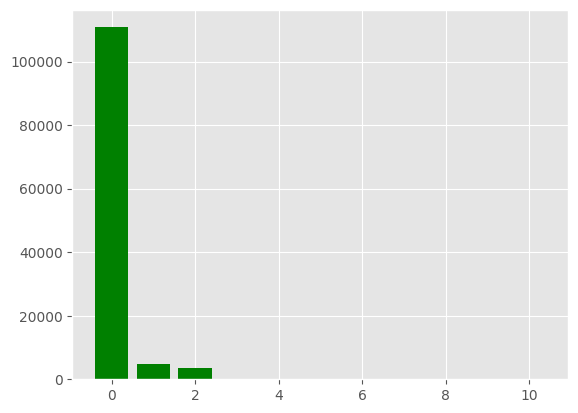

In [17]:
print(df['children'].value_counts()) #value_counts method returns the most frequent value in that column and the count of it
plt.bar(df['children'].value_counts().index,df['children'].value_counts().values)

In [18]:
#For children 0 is the most frequest value which is mode and median.
#So, we decide to replace the missing values of children with 0
df['children'] = df['children'].fillna(0)
df['children'].isna().sum()

0

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64


Text(0, 0.5, '')

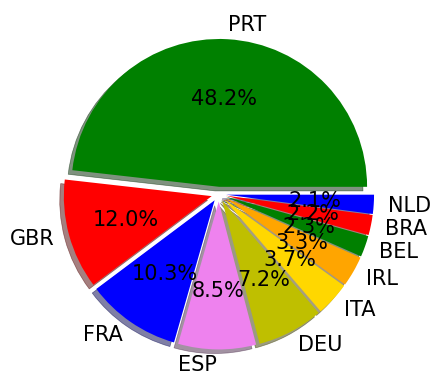

In [19]:
#Imputing the missing values in column country with most frequest country
print(df['country'].value_counts())

top_country = df['country'].value_counts().nlargest(10)
top_country.plot.pie(explode=[0.05]*top_country.nunique(), autopct='%1.1f%%', shadow=True, fontsize=15)
plt.ylabel('')

In [20]:
df['country'] = df['country'].fillna(df['country'].value_counts().index[0])
df.country.isna().sum()

0

In [21]:
df[['agent', 'company']].isna().sum()

agent       16340
company    112593
dtype: int64

In [22]:
#'company' column : has more than 90% of missing values, so dropping it as it is not needed
#'agent' column : the most frequent value is very less but the actual missing values are much high.
#Imputing with mode will not be optimal and as most of the values are NaN, we can impute 0 or drop the agent column
df = df.drop(columns = ['agent', 'company'])
df.shape

(119390, 30)

In [23]:
#Check if the missing values after handling all the columns is 0
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Data Pre-Processing

In [24]:
tooLate = df.loc[df['lead_time'] > 365]
print("Number of days that elapsed between the entering date of the booking into")
print(f"the PMS and the arrival date that depasse 1 year : {tooLate.shape[0]/df.shape[0]*100} %")

Number of days that elapsed between the entering date of the booking into
the PMS and the arrival date that depasse 1 year : 2.636736745121032 %


187        5
733        5
1440       5
1655      17
2881       6
          ..
118580     7
118631     7
118960     6
119167     7
119268    10
Name: booking_changes, Length: 267, dtype: int64


Text(0.5, 1.0, 'Booking Changes')

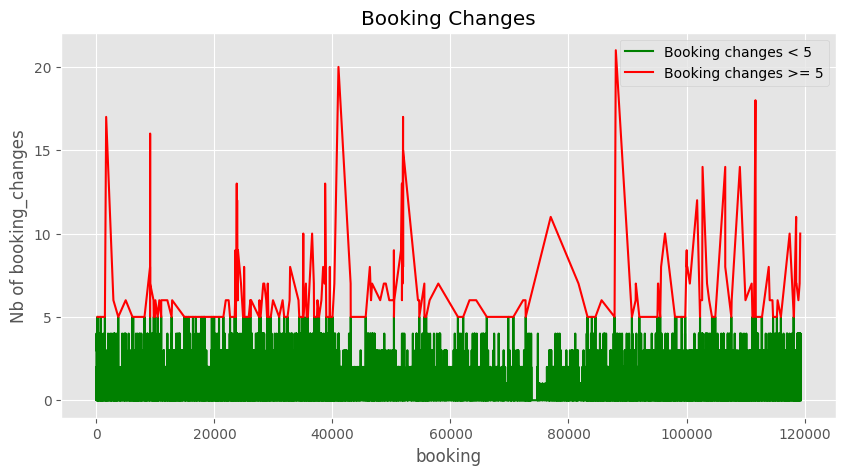

In [25]:
tooChangeOfBokking = df.loc[df['booking_changes'] >= 5].booking_changes
not_tooChangeOfBokking = df.loc[df['booking_changes'] <= 5].booking_changes
#tooChangeOfBokking = df.loc[df['booking_changes'] >= 2].iloc[:,21:23]
#tooChangeOfBokking.iloc[:,21:23]
print(tooChangeOfBokking)

#plot
plt.figure(figsize=(10, 5))
plt.plot(not_tooChangeOfBokking.index, not_tooChangeOfBokking.values, label='Booking changes < 5', color='green')
plt.plot(tooChangeOfBokking.index, tooChangeOfBokking.values, label='Booking changes >= 5', color='red')
plt.xlabel("booking")
plt.ylabel("Nb of booking_changes")
plt.legend()
plt.title("Booking Changes")

# ... Confidential

### More analysis

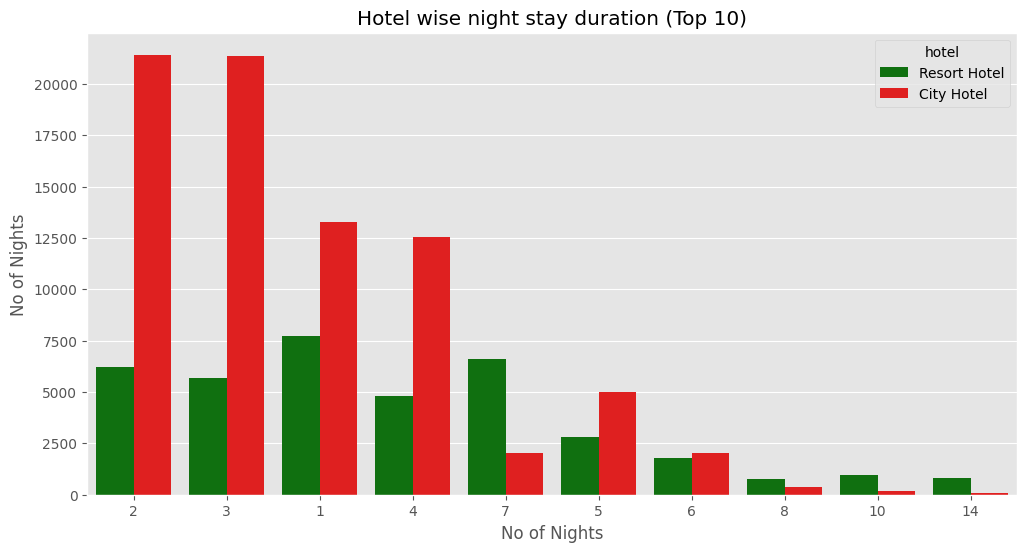

In [75]:
#How Long People Stay in the hotel?
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_stays_nights', hue='hotel', data=df,
              order = df.total_stays_nights.value_counts().iloc[:10].index, ax=ax);

# ... Confidential

#### Visual KPI

<Axes: >

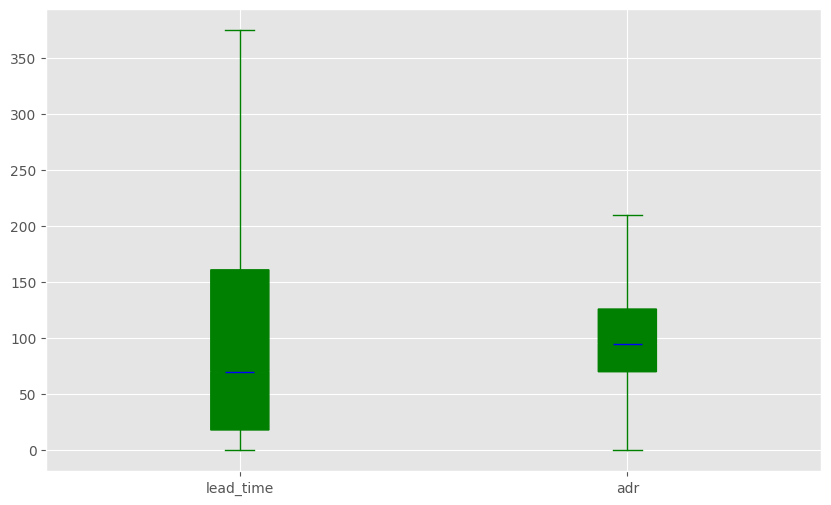

In [90]:
df[['lead_time', 'adr']].plot.box(
    showfliers=False,  # Remove outliers
    patch_artist=True,  # Fill the box with color
    notch=True,  # Notch shape for the boxes
    figsize=(10, 6)
)

<Axes: >

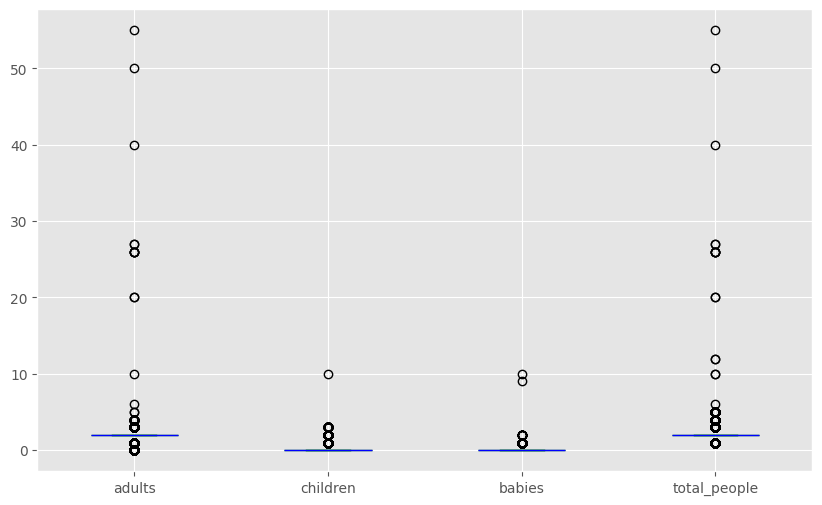

In [91]:
df[['adults','children','babies','total_people']].plot.box(
    showfliers=True,  
    patch_artist=True,   
    figsize=(10, 6)
)

<Axes: >

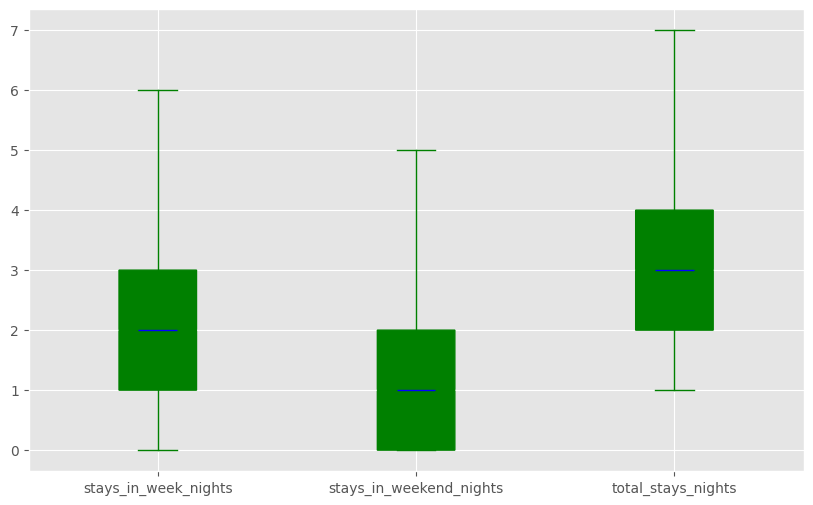

In [92]:
df[['stays_in_week_nights','stays_in_weekend_nights','total_stays_nights']].plot.box(
    showfliers=False,  # Remove outliers
    patch_artist=True,  # Fill the box with color
    notch=True,  # Notch shape for the boxes
    figsize=(10, 6)
) 

# ...
# ... Confidential

#### Numerical KPI

In [99]:
#Taux d'Annulation : Pourcentage de réservations annulées.


KPI - Taux d'Annulation 
 37.258672604438146 %


In [100]:
#Temps de Préavis Moyen : Moyenne du lead_time pour les réservations annulées et non annulées.


KPI - Avg lead_time 
 is_canceled
0     80.486154
1    144.953028
Name: lead_time, dtype: float64


In [101]:
#Durée Moyenne des Séjours : Moyenne des stays_in_weekend_nights et stays_in_week_nights pour les réservations annulées et non annulées


KPI - Avg stay_duration 
              stays_in_weekend_nights  stays_in_week_nights
is_canceled                                               
0                           0.935783              2.482538
1                           0.925840              2.563690


# ...
# ... Confidential

<hr>

##### On continue l'analyse des données sur Power BI !!!
Pour des definir des KPIs et pour des visualisations interactifs  
Pour un bon arrangement et catégorisation des visualisations 

# ...

# ...  confidential

# ...

# ...  confidential

<hr>

# ML model

In [211]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    f1_score, 
    accuracy_score, 
    recall_score, 
    confusion_matrix,
    classification_report, 
    precision_score, 
    roc_auc_score,
    auc, 
    roc_curve,
    precision_recall_curve,
    make_scorer)

import warnings
warnings.filterwarnings("ignore")


### Feature Selection and Feature Engineering

In [212]:
## Copy the dataframe
df_subset = df.copy()
df_subset.shape

(118563, 32)

In [213]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118563 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118563 non-null  object 
 1   is_canceled                     118563 non-null  int64  
 2   lead_time                       118563 non-null  int64  
 3   arrival_date_year               118563 non-null  int64  
 4   arrival_date_month              118563 non-null  object 
 5   arrival_date_week_number        118563 non-null  int64  
 6   arrival_date_day_of_month       118563 non-null  int64  
 7   stays_in_weekend_nights         118563 non-null  int64  
 8   stays_in_week_nights            118563 non-null  int64  
 9   adults                          118563 non-null  int64  
 10  children                        118563 non-null  float64
 11  babies                          118563 non-null  int64  
 12  meal                 

In [214]:
#Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form


# ...

# ...  confidential

In [215]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118563 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118563 non-null  int32  
 1   is_canceled                     118563 non-null  int64  
 2   lead_time                       118563 non-null  int64  
 3   arrival_date_year               118563 non-null  int64  
 4   arrival_date_month              118563 non-null  int32  
 5   arrival_date_week_number        118563 non-null  int64  
 6   arrival_date_day_of_month       118563 non-null  int64  
 7   stays_in_weekend_nights         118563 non-null  int64  
 8   stays_in_week_nights            118563 non-null  int64  
 9   adults                          118563 non-null  int64  
 10  children                        118563 non-null  float64
 11  babies                          118563 non-null  int64  
 12  meal                 

### Models training

#### HANDLING IMBALANCED DATASET

• When the data is imbalanced there is a chance that the model  will be biased towards majority class.  
• Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class.   
• Simply adding duplicate records of minority class often don’t add any new information to the model.   
• In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.  
• We still haven't balanced the data set as SMOTE tends to create a large no. of noisy data points in feature space.  

#### ==> We see what we can do while developping the models

In [122]:
# Lists
model_names = ['KNN','DecisionTree', 'SMOTE KNN', 'SMOTE DecisionTree', 'RandomForest', 'XGBoost']
accuracy_scores = []
overfitting_checks = []

KNN

Decesion Tree

##### Model training using SMOTE

**SMOTE (Synthetic Minority Over-sampling Technique) is a method used to address class imbalance in datasets, particularly in the context of machine learning classification tasks. When you have a dataset where one class is underrepresented compared to others (e.g., fraud detection, rare disease prediction), this imbalance can lead to biased model performance. SMOTE helps mitigate this issue by synthetically creating new instances of the minority class**

In [139]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

KNN using SMOTE Method

Decesion Tree using SMOTE Method

Random Forest ~~using SMOTE Method~~

XGBoost ~~using SMOTE Method~~

##### Model Evaluation Criterion

Model can make a wrong prediction as:
- Predicting a person will cancel a booking, when a person will not cancel the booking (False Negatives).
This will result in loss of potential revenue & business for the hotel chain
- Predicting a person will not cancel a booking, when a person will cancel the booking (False Positives)
This will result in last minute cancellations -loss of revenue due to hiring of human resources for guests who will no longer come, as well as profit-margin loss in case of trying to price the room cheap to get last minute bookings

*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly

* The model_performance_classification_statsmodels function will be used to check the model performance of models

# ...

# ...  confidential

#### More of Models Performance Analysis

# ...

# ...  confidential

#### Files "*.pkl" successively uploaded in the main folder
#### Now, move on to the pms.py file where we develop the Qt GUI where we deploy our ML/IA trained model  

                               *********************************************************

# ...

# ...  confidential